# Analyzing Starbucks App Customer Data

- 🏆 80 points available
- 🤠 Author: Park (ypark32@illinois.edu)
- ✏️ Last updated on 09/19/2022

---

## 💎 Case overview

You're hired by Starbucks as a business analyst to identify what type of loyalty offers have been successful in the past. Before diving into loyalty offers, you first want to understand the customer behaviors by demographics (gender, age, and income) without taking loyalty offers into account.

![Starbucks Image](https://github.com/bdi475/images/blob/ab5405d6b8bdcadf788034d957475d272d5f7c3e/case-studies/starbucks-rewards-app/starbucks-case-intro.jpg?raw=true)

The dataset was originally provided to Udacity by Starbucks as a part of a Data Science nanodegree. Three datasets were provided.

1. Transcript: a list of all purchases (transactions) and events related loyalty offers
2. Profile: demographics data for each customer in the Rewards app; customers who have not provided their demographics information will show up as `np.nan`
3. Portfolio: offer information

For the purpose of this case study, we will only use the first two datasets.

### ⚔️ Your goal

Below are some of the questions you want to answer.

- How many purchases were made through the rewards app?
- What were the mean, median, and max transaction amounts?
- How many customers have not provided their demographic information?
- On average, which gender makes the largest purchases? Which gender are most likely to spend the least amount?
- Is there a correlation between the age group and customer behaviors?
- How about the income group?
- Which gender/age groups are more “lucrative” compared to others?

▶️ First, run the code cell below to import `unittest`, a module used for **🧭 Check Your Work** sections.

In [1]:
# DO NOT MODIFY THE CODE IN THIS CELL
import unittest
tc = unittest.TestCase()

---

### 🎯 Part 1: Import Pandas and NumPy

#### 👇 Tasks

- ✔️ Import the following Python packages.
    1. `pandas`: Use alias `pd`.
    2. `numpy`: Use alias `np`.

In [2]:
# YOUR CODE BEGINS
import pandas as pd
import numpy as np

# YOUR CODE ENDS

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [3]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-01'
_points = 2

tc.assertTrue('pd' in globals(), 'Check whether you have correctly import Pandas with an alias.')
tc.assertTrue('np' in globals(), 'Check whether you have correctly import NumPy with an alias.')

# prevent user mixing up pandas and numpy
tc.assertTrue(hasattr(pd, 'DataFrame'))
tc.assertTrue(hasattr(np, 'ufunc'))

---

### 📌 Load data

Throughout this problem set, you'll work with the Starbucks Customer Rewards Program dataset. ☕ The dataset was originally released as a part of a capstone project of a Udacity course.

For the purpose of this course, the original dataset in JSON format has been transformed to CSV files for convenience. You can download the original JSON files [here](https://www.kaggle.com/blacktile/starbucks-app-customer-reward-program-data?select=portfolio.json).

▶️ Run the code cell below to read the transcripts data into `df_transcript`.

In [4]:
# DO NOT CHANGE THE CODE IN THIS CELL
df_transcript = pd.read_csv('https://github.com/bdi475/datasets/raw/main/starbucks-rewards/transcript.v2.csv.gz')

# Used for intermediate checks
df_transcript_backup = df_transcript.copy()

# Print 10 last rows
df_transcript.tail(10)

,member_id,event,time,offer_id,amount
306524,d613ca9c59dd42f497bdbf6178da54a7,transaction,714,NaN,25.14
306525,eec70ab28af74a22a4aeb889c0317944,transaction,714,NaN,43.58
306526,24f56b5e1849462093931b164eb803b5,transaction,714,NaN,22.64
306527,24f56b5e1849462093931b164eb803b5,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4,NaN
306528,5ca2620962114246ab218fc648eb3934,transaction,714,NaN,2.20
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,NaN,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,NaN,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,NaN,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,NaN,3.53
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,714,NaN,4.05


The table below describes the columns in `df_transcript`.

| Field | Description |
|---|---|
| member_id | Member ID |
| event | Type of event ('offer received',   'offer completed', 'transaction') |
| time | Time as continuous value |
| offer_id | Offer ID |
| amount | Amount of purchase or NaN if   non-purchase |

---

### 🎯 Part 2: Find the number of rows and columns

#### 👇 Tasks

- ✔️ Store the number of rows in `df_transcript` to a new variable named `num_rows`.
- ✔️ Store the number of columns in `df_transcript` to a new variable named `num_cols`.
- ✔️ Use `.shape`, not `len()`.

In [5]:
# YOUR CODE BEGINS
num_rows  = df_transcript.shape[0]
num_cols  = df_transcript.shape[1]
# YOUR CODE ENDS
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 306534
Number of columns: 5


#### 🧭 Check Your Work

In [6]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-02'
_points = 2

tc.assertEqual(num_rows, len(df_transcript_backup.index), f"Number of rows should be {len(df_transcript_backup.index)}")
tc.assertEqual(num_cols, len(df_transcript_backup.columns), f"Number of columns should be {len(df_transcript_backup.columns)}")

---

### 🎯 Part 3: Find unique event types

#### 👇 Tasks

- ✔️ Using `df_transcript`, find the unique list of event types.
- ✔️ In other words, find the unique values in the `event` column.
- ✔️ Store the result to a new variable named `unique_events`.
- ✔️ `unique_events` can either be a Python `list` or a Pandas `Series`.

#### 🚀 Sample code

```python
unique_values = my_dataframe['my_column'].unique()
```

In [7]:
# YOUR CODE BEGINS
unique_events = df_transcript['event'].unique()
# YOUR CODE ENDS
print(f'Event types: {unique_events}')

Event types: ['offer received' 'offer viewed' 'transaction' 'offer completed']


#### 🧭 Check Your Work

In [8]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-03'
_points = 3

unique_set = set(unique_events)
unique_CHECK = pd.Series(['received', 'viewed', 'completed'])
unique_CHECK = 'offer ' + unique_CHECK
unique_CHECK = pd.concat([unique_CHECK, pd.Series(['transaction'])])

tc.assertEqual(unique_set, set(unique_CHECK))

---

### 🎯 Part 4: Find all customer purchases

There are four event types. We'll first only look at customer purchases (transactions).

#### 👇 Tasks

- ✔️ Using `df_transcript`, find rows where the `event` is `"transaction"`.
    - We're excluding any events related to loyalty offers for now.
- ✔️ Store the filtered rows to `df_transactions`.
- ✔️ `df_transcript` should remain unaltered.

In [9]:
# YOUR CODE BEGINS
df_transactions = df_transcript[df_transcript['event']=='transaction']
# YOUR CODE ENDS
df_transactions.head(3)

,member_id,event,time,offer_id,amount
12654,02c083884c7d45b39cc68e1314fec56c,transaction,0,NaN,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,NaN,34.56
12659,54890f68699049c2a04d415abc25e717,transaction,0,NaN,13.23


#### 🔑 Expected Output of `df_transactions.head(3)`

|       |                        member_id |       event | time | offer_id | amount |
|------:|---------------------------------:|------------:|-----:|---------:|-------:|
| 12654 | 02c083884c7d45b39cc68e1314fec56c | transaction |    0 |      NaN |   0.83 |
| 12657 | 9fa9ae8f57894cc9a3b8a9bbe0fc1b2f | transaction |    0 |      NaN |  34.56 |
| 12659 | 54890f68699049c2a04d415abc25e717 | transaction |    0 |      NaN |  13.23 |

#### 🧭 Check Your Work

In [10]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-04'
_points = 3

# df_you should remain unaltered
pd.testing.assert_frame_equal(df_transcript, df_transcript_backup, "The original DataFrame should remain unaltered")

# Check result
pd.testing.assert_frame_equal(df_transactions.sort_values(df_transactions.columns.to_list()).reset_index(drop=True),
                              df_transcript_backup.query('event == "transaction"')
                                 .sort_values(df_transcript_backup.columns.tolist()).reset_index(drop=True))

---

### 🎯 Part 5: Drop unused columns

▶️ Before proceeding, run the code cell below.

In [11]:
# DO NOT CHANGE THE CODE BELOW
df_transactions = df_transactions.copy()

#### 👇 Tasks

- ✔️ Drop `event`, `time`, and `offer_id` columns from `df_transactions` **in-place**.
- ✔️ You should directly drop the columns from `df_transactions` using the `inplace=True` option.

#### 🚀 Hints

Use the following code as a reference.

```python
my_dataframe.drop(columns=["my_column1", "my_column2"], inplace=True)
```

In [12]:
# YOUR CODE BEGINS
df_transactions.drop(columns = ['event','time','offer_id'],inplace=True)
# YOUR CODE ENDS
df_transactions.head(3)

,member_id,amount
12654,02c083884c7d45b39cc68e1314fec56c,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,34.56
12659,54890f68699049c2a04d415abc25e717,13.23


#### 🔑 Expected Output

|       |                        member_id | amount |
|------:|---------------------------------:|-------:|
| 12654 | 02c083884c7d45b39cc68e1314fec56c |   0.83 |
| 12657 | 9fa9ae8f57894cc9a3b8a9bbe0fc1b2f |  34.56 |
| 12659 | 54890f68699049c2a04d415abc25e717 |  13.23 |

#### 🧭 Check Your Work

In [13]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-05'
_points = 3

df_check = df_transcript_backup.query('event == "transaction"')[['member_id', 'amount']]

# Check result
pd.testing.assert_frame_equal(df_transactions.sort_values(df_transactions.columns.to_list()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

---

### 🎯 Part 6: Count, mean, median, and max transaction amount

#### 👇 Tasks

- ✔️ Find the count, mean (average), max, and median of all purchase amounts.
    - Use the `amount` column in `df_transactions`.
- ✔️ Store the calculated results to the following three new variables:
    - `num_transactions`: Number of transactions
    - `amount_mean`: Average transaction amount
    - `amount_median`: Median transaction amount
    - `amount_max`: Maximum transaction amount

#### 🚀 Hints

```python
len(my_dataframe['my_column'])     # Returns the number of row s
my_dataframe['my_column'].mean()   # Returns the mean of a Series
my_dataframe['my_column'].median() # Returns the median of a Series
my_dataframe['my_column'].max()    # Returns the max of a Series
```

#### 🔑 Expected Output

```
138953 transactions
mean=12.78, median=8.89, max=1062.28
```

In [14]:
# YOUR CODE BEGINS
num_transactions = len(df_transactions)
amount_mean = df_transactions['amount'].mean()
amount_median= df_transactions['amount'].median()
amount_max= df_transactions['amount'].max()

# YOUR CODE ENDS
print(f'{num_transactions} transactions')
print(f'mean={amount_mean:.2f}, median={amount_median:.2f}, max={amount_max:.2f}')

138953 transactions
mean=12.78, median=8.89, max=1062.28


#### 🧭 Check Your Work

In [15]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-06'
_points = 4

tc.assertEqual(num_transactions, 138953)
tc.assertAlmostEqual(amount_mean, 12.777356156398204)
tc.assertAlmostEqual(amount_median, 8.89)
tc.assertAlmostEqual(amount_max, 1062.28)

---

### 📌 Load customer profiles

We want to go further with the purchase data analysis by looking at the customers. Unfortunately, the information we currently have about the customers in each purchase is limited. We only have their unique IDs (e.g., `02c083884c7d45b39cc68e1314fec56c`, `9fa9ae8f57894cc9a3b8a9bbe0fc1b2f`).

In the next few steps, you'll read the customer profiles data and link them to `df_transactions` using `member_id`.

▶️ Run the code cell below to read the customer profiles data into `df_profiles`.

In [16]:
# DO NOT CHANGE THE CODE IN THIS CELL
df_profiles = pd.read_csv('https://github.com/bdi475/datasets/raw/main/starbucks-rewards/profile.csv')

# Used for intermediate checks
df_profiles_backup = df_profiles.copy()

# Print first 10 rows
df_profiles.head(10)

,member_id,gender,age,became_member_on,income
0,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN,2017-02-12,NaN
1,0610b486422d4921ae7d2bf64640c50b,F,55.0,2017-07-15,112000.0
2,38fe809add3b4fcf9315a9694bb96ff5,NaN,NaN,2018-07-12,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,F,75.0,2017-05-09,100000.0
4,a03223e636434f42ac4c3df47e8bac43,NaN,NaN,2017-08-04,NaN
5,e2127556f4f64592b11af22de27a7932,M,68.0,2018-04-26,70000.0
6,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,NaN,2017-09-25,NaN
7,68617ca6246f4fbc85e91a2a49552598,NaN,NaN,2017-10-02,NaN
8,389bc3fa690240e798340f5a15918d5c,M,65.0,2018-02-09,53000.0
9,8974fc5686fe429db53ddde067b88302,NaN,NaN,2016-11-22,NaN


The table below describes the columns in `df_profiles`.

| Field | Description |
|---|---|
| member_id | Unique identifier for each Starbucks app member |
| gender | Gender (NaN if unknown) |
| age | Age (NaN if unknown) |
| became_member_on | Sign-up date |
| income | Annual income (NaN if unknown) |

---

### 🎯 Part 7: Find the number of rows and columns

#### 👇 Tasks

- ✔️ Store the number of rows in `df_profiles` to `num_rows`.
- ✔️ Store the number of columns in `df_profiles` to `num_cols`.
- ✔️ Use `.shape`, not `len()`.

In [17]:
# YOUR CODE BEGINS
num_rows = df_profiles.shape[0]
num_cols = df_profiles.shape[1]
# YOUR CODE ENDS
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 17000
Number of columns: 5


#### 🧭 Check Your Work

In [18]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-07'
_points = 2

tc.assertEqual(num_rows, len(df_profiles_backup.index), f"Number of rows should be {len(df_profiles_backup.index)}")
tc.assertEqual(num_cols, len(df_profiles_backup.columns), f"Number of columns should be {len(df_profiles_backup.columns)}")

---
### 🎯 Part 8: Find the number of rows with missing gender value

#### 👇 Tasks

- ✔️ Find the number of rows where the value in the `gender` column is missing (`NaN`).
- ✔️ Store the count to a new variable named `num_missing`.

#### 🚀 Hints

1. `df["my_column"].isna()` returns a Series of boolean values where rows with missing values return `True`.
2. `my_boolean_series.sum()` returns the number of `True` values in a boolean Series.
    - Python will convert `True` to `1` and `False` to `0` when performing arithmetic operations on boolean values.

#### 🔑 Expected Output

`There are 2175 rows where the gender value is missing.`

In [19]:
# YOUR CODE BEGINS
num_missing= df_profiles['gender'].isna().sum()
# YOUR CODE ENDS
print(f'There are {num_missing} rows with missing gender value.')

There are 2175 rows with missing gender value.


#### 🧭 Check Your Work

In [20]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-08'
_points = 3

tc.assertEqual(num_missing, 2175)

---

### 🎯 Part 9: Remove rows with missing values

#### 👇 Tasks

- ✔️ Update `df_profiles` so that it only contains rows where `gender` is NOT missing.

#### 🚀 Hints

```python
my_dataframe = my_dataframe[my_dataframe['my_column'].notna()]
```

In [21]:
# YOUR CODE BEGINS
df_profiles = df_profiles[df_profiles['gender'].notna()]
# YOUR CODE ENDS
df_profiles.head(5)

,member_id,gender,age,became_member_on,income
1,0610b486422d4921ae7d2bf64640c50b,F,55.0,2017-07-15,112000.0
3,78afa995795e4d85b5d9ceeca43f5fef,F,75.0,2017-05-09,100000.0
5,e2127556f4f64592b11af22de27a7932,M,68.0,2018-04-26,70000.0
8,389bc3fa690240e798340f5a15918d5c,M,65.0,2018-02-09,53000.0
12,2eeac8d8feae4a8cad5a6af0499a211d,M,58.0,2017-11-11,51000.0


#### 🔑 Expected Output

|  | member_id | gender | age | became_member_on | income |
|---:|---:|---:|---:|---:|---:|
| 1 | 0610b486422d4921ae7d2bf64640c50b | F | 55.0 | 2017-07-15 | 112000.0 |
| 3 | 78afa995795e4d85b5d9ceeca43f5fef | F | 75.0 | 2017-05-09 | 100000.0 |
| 5 | e2127556f4f64592b11af22de27a7932 | M | 68.0 | 2018-04-26 | 70000.0 |
| 8 | 389bc3fa690240e798340f5a15918d5c | M | 65.0 | 2018-02-09 | 53000.0 |
| 12 | 2eeac8d8feae4a8cad5a6af0499a211d | M | 58.0 | 2017-11-11 | 51000.0 |

#### 🧭 Check Your Work

In [22]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-09'
_points = 3

df_check = df_profiles_backup.query('gender == gender')

# Check result
pd.testing.assert_frame_equal(df_profiles.sort_values(df_profiles.columns.to_list()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

---
### 🎯 Part 10: Find the number of rows with missing gender value again

#### 👇 Tasks

- ✔️ Create the following three new variables:
    1. `num_missing_gender`: number of rows where the value in the `gender` column is missing (`NaN`)
    2. `num_missing_age`: number of rows where the value in the `age` column is missing
    3. `num_missing_income`: number of rows where the value in the `income` column is missing
    
#### 🚀 Hints

```python
# find the number of missing rows in my_column
my_dataframe["my_column"].isna().sum()
```

In [23]:
# YOUR CODE BEGINS
num_missing_gender = df_profiles["gender"].isna().sum()
num_missing_age = df_profiles["age"].isna().sum()
num_missing_income = df_profiles["income"].isna().sum()


# YOUR CODE ENDS
print(f'There are {num_missing_gender} rows with missing gender value.')
print(f'There are {num_missing_age} rows with missing age value.')
print(f'There are {num_missing_income} rows with missing income value.')

There are 0 rows with missing gender value.
There are 0 rows with missing age value.
There are 0 rows with missing income value.


#### 🔑 Expected Output

```
There are 0 rows with missing gender value.
There are 0 rows with missing age value.
There are 0 rows with missing income value.
```

#### 🧭 Check Your Work

In [24]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-10'
_points = 3

tc.assertEqual(num_missing_gender, 0)
tc.assertEqual(num_missing_age, 0)
tc.assertEqual(num_missing_income, 0)

---

### 🎯 Part 11: Merge profiles into transactions

▶️ Run the code below to:
1. Convert `age` and `income` columns in `df_profiles` to integer types (from float types).
    - By default, Pandas uses `np.float64` data type for numeric columns with missing values even if the values are integers.
    - Now that we have removed all the rows with missing values, we're converting the columns to `np.int64` columns.
2. Print out the first three rows of `df_transactions` and `df_profiles`.

In [25]:
# convert age and income to int64 types
df_profiles['age'] = df_profiles['age'].astype(np.int64)
df_profiles['income'] = df_profiles['income'].astype(np.int64)

display(df_transactions.head(3))
display(df_profiles.head(3))

,member_id,amount
12654,02c083884c7d45b39cc68e1314fec56c,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,34.56
12659,54890f68699049c2a04d415abc25e717,13.23


,member_id,gender,age,became_member_on,income
1,0610b486422d4921ae7d2bf64640c50b,F,55,2017-07-15,112000
3,78afa995795e4d85b5d9ceeca43f5fef,F,75,2017-05-09,100000
5,e2127556f4f64592b11af22de27a7932,M,68,2018-04-26,70000


#### 👇 Tasks

- ✔️ Merge `df_transactions` and `df_profiles` using an **inner** join type.
    - By using an inner join, we are intentionally removing transactions made by customers with missing gender information.
    - Don't worry about the different types of joins yet. Google "pandas types of joins" if you'd like to find out more.
- ✔️ Place `df_transactions` on the "left" side.
- ✔️ Store the merged DataFrame to `df_merged`.

#### 🚀 Hints

```python
my_merged_dataframe = pd.merge(
    left=left_dataframe,
    right=right_dataframe,
    on='my_common_column',
    how='inner'
)
```

In [26]:
# YOUR CODE BEGINS
df_merged= pd.merge(
    left = df_transactions,
    right = df_profiles,
    on = 'member_id',
    how = 'inner'
)



# YOUR CODE ENDS
df_merged.head(5)

,member_id,amount,gender,age,became_member_on,income
0,02c083884c7d45b39cc68e1314fec56c,0.83,F,20,2016-07-11,30000
1,02c083884c7d45b39cc68e1314fec56c,1.44,F,20,2016-07-11,30000
2,02c083884c7d45b39cc68e1314fec56c,4.56,F,20,2016-07-11,30000
3,02c083884c7d45b39cc68e1314fec56c,1.53,F,20,2016-07-11,30000
4,02c083884c7d45b39cc68e1314fec56c,0.50,F,20,2016-07-11,30000


#### 🔑 Expected Output

|  | member_id | amount | gender | age | became_member_on | income |
|---:|---:|---:|---:|---:|---:|---:|
| 0 | 02c083884c7d45b39cc68e1314fec56c | 0.83 | F | 20 | 2016-07-11 | 30000 |
| 1 | 02c083884c7d45b39cc68e1314fec56c | 1.44 | F | 20 | 2016-07-11 | 30000 |
| 2 | 02c083884c7d45b39cc68e1314fec56c | 4.56 | F | 20 | 2016-07-11 | 30000 |
| 3 | 02c083884c7d45b39cc68e1314fec56c | 1.53 | F | 20 | 2016-07-11 | 30000 |
| 4 | 02c083884c7d45b39cc68e1314fec56c | 0.50 | F | 20 | 2016-07-11 | 30000 |

#### 🧭 Check Your Work

In [27]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-11'
_points = 5

df_check = df_transcript_backup.query('event == "transaction"').merge(
    df_profiles_backup.query('gender == gender'),
    on='member_id',
    how='inner'
).drop(columns=['event', 'time', 'offer_id'])
df_check['age'] = df_check['age'].astype(np.int64)
df_check['income'] = df_check['income'].astype(np.int64)
df_merged_backup = df_check.copy()

# Check result
pd.testing.assert_frame_equal(df_merged.sort_values(df_merged.columns.to_list()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

---

### 🎯 Part 12: Average transaction amount by gender

#### 👇 Tasks

- ✔️ Using `df_merged`, find the average transaction amount by gender.
- ✔️ Store the summary DataFrame to `df_mean_by_gender`.
- ✔️ `df_mean_by_gender` should have two non-index columns.
    - `df_mean_by_gender.columns.to_list()` should print out `['gender', 'amount']`.
- ✔️ `df_merged` should remain unaltered.

#### 🚀 Hints

```python
my_result = df.groupby('some_column', as_index=False).agg({
      'another_column': 'mean'
})
```

In [28]:
# YOUR CODE BEGINS
df_mean_by_gender = df_merged.groupby('gender',as_index=False).agg({
    'amount':'mean'
})

# YOUR CODE ENDS
df_mean_by_gender

,gender,amount
0,F,17.490077
1,M,11.606600
2,O,14.798731


#### 🔑 Expected Output

|  | gender | amount |
|---:|---:|---|
| 0 | F | 17.490077 |
| 1 | M | 11.606600 |
| 2 | O | 14.798731 |

#### 🧭 Check Your Work

In [29]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-12'
_points = 4

df_check = pd.DataFrame({'gender': {0: 'F', 1: 'M', 2: 'O'},
 'amount': {0: 17.490077356121578,
  1: 11.606600269252956,
  2: 14.798731049971932}})

# Check result
tc.assertEqual(df_merged.shape, df_merged_backup.shape)
pd.testing.assert_frame_equal(df_mean_by_gender.sort_values(df_mean_by_gender.columns.to_list()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

---

### 🎯 Part 13: Multiple statistics by gender

We already can see that females spend more on average than other genders. Your goal is to expand the analysis that you just did to derive more insights.

#### 👇 Tasks

- ✔️ Using `df_merged`, find the following statistics by gender:
    - `count`: number of transactions
    - `mean`: average amount of transactions
    - `median`: median amount
    - `sum`: total amount of transactions
    - `std`: standard deviation of transactions
- ✔️ Store the summary DataFrame to `df_stats_by_gender`.
- ✔️ `df_stats_by_gender` should have six non-index columns.
    - `print(df_stats_by_gender.columns.to_list())` should print out `['gender', 'count', 'mean', 'median', 'sum', 'std']`.
- ✔️ `df_merged` should remain unaltered.

#### 🚀 Hints

```python
my_result = my_dataframe.groupby('my_column', as_index=False).agg({
    'some_column': ['count', 'mean', 'median', 'sum', 'std']
})

# rename columns with a flat list
# replace ... with your own strings
my_result.columns = ['gender', 'count', ..., ..., ..., ...]
```

In [30]:
# YOUR CODE BEGINS
df_stats_by_gender = df_merged.groupby('gender',as_index=False).agg({
    'amount': ['count', 'mean', 'median', 'sum', 'std']
})

df_stats_by_gender.columns = ['gender', 'count',  'mean', 'median', 'sum', 'std']



# YOUR CODE ENDS
print(df_stats_by_gender.columns.to_list())
display(df_stats_by_gender)

['gender', 'count', 'mean', 'median', 'sum', 'std']


,gender,count,mean,median,sum,std
0,F,49382,17.490077,15.00,863695.00,35.342611
1,M,72794,11.606600,7.05,844890.86,28.964542
2,O,1781,14.798731,13.30,26356.54,25.748149


#### 🔑 Expected Output

|  | gender | count | mean | median | sum | std |
|---:|---:|---:|---:|---:|---:|---:|
| 0 | F | 49382 | 17.490077 | 15.00 | 863695.00 | 35.342611 |
| 1 | M | 72794 | 11.606600 | 7.05 | 844890.86 | 28.964542 |
| 2 | O | 1781 | 14.798731 | 13.30 | 26356.54 | 25.748149 |

#### 🧭 Check Your Work

In [31]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-13'
_points = 7

df_check = pd.DataFrame({'gender': ['F', 'M', 'O'], 'count': [49382, 72794, 1781],
 'mean': [17.490077356121663, 11.60660026925296, 14.798731049971927],
 'median': [15.0, 7.05, 13.3], 'sum': [863695.0, 844890.86, 26356.54],
 'std': [35.34261142117411, 28.96454214855915, 25.74814916149888]})

# Check result
pd.testing.assert_frame_equal(df_stats_by_gender.sort_values(df_stats_by_gender.columns.to_list()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

---

### 🎯 Part 14: Create age groups

Next, you would like to find out the average transaction amount by different age groups(e.g., 10-20, 20-30, 30-40, etc). In order to perform that analysis, we'll create a new column containing the age group information.

A fully-working code is given to you since we haven't learned `pd.cut()` in class. 🦊 `pd.cut()` converts a numerical values into a set of categorical values.

#### 👇 Tasks

- ✔️ Copy and run the code below.

```python
df_merged['age_group'] = pd.cut(
    df_merged['age'],
    bins=[10, 20, 30, 40, 50, 999],
    labels=['10-20', '20-30', '30-40', '40-50', '50>']
)
```

In [32]:
# YOUR CODE BEGINS
df_merged['age_group'] = pd.cut(
    df_merged['age'],
    bins=[10, 20, 30, 40, 50, 999],
    labels=['10-20', '20-30', '30-40', '40-50', '50>']
)

# YOUR CODE ENDS
df_merged.head(5)

,member_id,amount,gender,age,became_member_on,income,age_group
0,02c083884c7d45b39cc68e1314fec56c,0.83,F,20,2016-07-11,30000,10-20
1,02c083884c7d45b39cc68e1314fec56c,1.44,F,20,2016-07-11,30000,10-20
2,02c083884c7d45b39cc68e1314fec56c,4.56,F,20,2016-07-11,30000,10-20
3,02c083884c7d45b39cc68e1314fec56c,1.53,F,20,2016-07-11,30000,10-20
4,02c083884c7d45b39cc68e1314fec56c,0.50,F,20,2016-07-11,30000,10-20


#### 🔑 Expected Output

|  | member_id | amount | gender | age | became_member_on | income | age_group |
|---:|---:|---:|---:|---:|---:|---:|---:|
| 0 | 02c083884c7d45b39cc68e1314fec56c | 0.83 | F | 20 | 2016-07-11 | 30000 | 10-20 |
| 1 | 02c083884c7d45b39cc68e1314fec56c | 1.44 | F | 20 | 2016-07-11 | 30000 | 10-20 |
| 2 | 02c083884c7d45b39cc68e1314fec56c | 4.56 | F | 20 | 2016-07-11 | 30000 | 10-20 |
| 3 | 02c083884c7d45b39cc68e1314fec56c | 1.53 | F | 20 | 2016-07-11 | 30000 | 10-20 |
| 4 | 02c083884c7d45b39cc68e1314fec56c | 0.50 | F | 20 | 2016-07-11 | 30000 | 10-20 |

#### 🧭 Check Your Work

In [33]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-14'
_points = 3

df_check = df_merged.copy()
age_groups = ['50>', '40-50', '30-40', '20-30', '10-20']
age_groups.reverse()
df_check['age_group'] = pd.cut(
    df_check['AGE'.lower()],
    bins=[x * 10 for x in [1, 2, 3, 4, 5]] + [1000],
    labels=age_groups
)

# Check result
pd.testing.assert_frame_equal(df_merged.sort_values(df_merged.columns.to_list()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

---

### 🎯 Part 15: Average transaction amount by age group

#### 👇 Tasks

- ✔️ Using `df_merged`, find the average transaction amount by age group (`age_group` column).
- ✔️ Store the summary DataFrame to `df_mean_by_age_group`.
- ✔️ `df_mean_by_age_group` should contain two non-index columns.
    - `df_mean_by_age_group.columns.to_list()` should print out `['age_group', 'amount']`.
- ✔️ `df_merged` should remain unaltered.

In [34]:
# YOUR CODE BEGINS
df_mean_by_age_group = df_merged.groupby('age_group',as_index=False).agg({
    'amount':'mean'
})

# YOUR CODE ENDS
df_mean_by_age_group

,age_group,amount
0,10-20,7.480393
1,20-30,8.407166
2,30-40,10.251975
3,40-50,13.473675
4,50>,16.409890


#### 🔑 Expected Output

|    | age_group   |   amount |
|---:|:------------|---------:|
|  0 | 10-20       |  7.48039 |
|  1 | 20-30       |  8.40717 |
|  2 | 30-40       | 10.252   |
|  3 | 40-50       | 13.4737  |
|  4 | 50>         | 16.4099  |

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [35]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-15'
_points = 4

df_check = pd.DataFrame({'age_group': {0: '10-20', 1: '20-30', 2: '30-40', 3: '40-50', 4: '50>'},
 'amount': {0: 7.4803926701570775, 1: 8.407165820643007, 2: 10.251975269699113, 3: 13.473675454312783, 4: 16.40988963903655}})
df_mean_by_age_group_copy = df_mean_by_age_group.copy()
df_mean_by_age_group_copy['age_group'] = df_mean_by_age_group_copy['age_group'].astype(str)
# Check result
pd.testing.assert_frame_equal(df_mean_by_age_group_copy.sort_values(df_mean_by_age_group_copy.columns.to_list()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))


---

### 🎯 Part 16: Multiple statistics by age group

#### 👇 Tasks

- ✔️ Using `df_merged`, find the following statistics by age group:
    - `count`: number of transactions
    - `mean`: average amount of transactions
    - `median`: median amount
    - `sum`: total amount of transactions
    - `std`: standard deviation of transactions
- ✔️ Store the summary DataFrame to `df_stats_by_age_group`.
- ✔️ `df_stats_by_age_group` should have six non-index columns.
    - `print(df_stats_by_age_group.columns.to_list())` should print out `['age_group', 'count', 'mean', 'median', 'sum', 'std']`.
- ✔️ `df_merged` should remain unaltered.

#### 🚀 Hints

```python
my_result = my_dataframe.groupby('my_column', as_index=False).agg({
    'some_column': ['count', 'mean', 'median', 'sum', 'std']
})

# rename columns with a flat list
# replace ... with your own strings
my_result.columns = ['gender', 'count', ..., ..., ..., ...]
```

In [36]:
# YOUR CODE BEGINS
df_stats_by_age_group = df_merged.groupby('age_group',as_index=False).agg({
    'amount': ['count', 'mean', 'median', 'sum', 'std']
})

df_stats_by_age_group.columns = ['age_group', 'count',  'mean', 'median', 'sum', 'std']




# YOUR CODE ENDS
print(df_stats_by_age_group.columns.to_list())
display(df_stats_by_age_group)

['age_group', 'count', 'mean', 'median', 'sum', 'std']


,age_group,count,mean,median,sum,std
0,10-20,3438,7.480393,4.345,25717.59,18.218205
1,20-30,14184,8.407166,4.920,119247.24,22.433536
2,30-40,15851,10.251975,6.650,162504.06,25.777848
3,40-50,19535,13.473675,11.040,263208.25,26.798969
4,50>,70949,16.409890,13.980,1164265.26,35.790405


#### 🔑 Expected Output

|  | age_group | count | mean | median | sum | std |
|---:|---:|---:|---:|---:|---:|---:|
| 0 | 10-20 | 3438 | 7.480393 | 4.345 | 25717.59 | 18.218205 |
| 1 | 20-30 | 14184 | 8.407166 | 4.920 | 119247.24 | 22.433536 |
| 2 | 30-40 | 15851 | 10.251975 | 6.650 | 162504.06 | 25.777848 |
| 3 | 40-50 | 19535 | 13.473675 | 11.040 | 263208.25 | 26.798969 |
| 4 | 50> | 70949 | 16.409890 | 13.980 | 1164265.26 | 35.790405 |

#### 🧭 Check Your Work

In [37]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-16'
_points = 7

df_check = pd.DataFrame({'age_group': pd.Categorical(['10-20', '20-30', '30-40', '40-50', '50>'],
                        categories=['10-20', '20-30', '30-40', '40-50', '50>'], ordered=True),
 'count': [3438, 14184, 15851, 19535, 70949], 'mean': [7.480392670157068, 8.407165820642978, 10.251975269699072,
  13.473675454312772, 16.409889639036493], 'median': [4.345, 4.92, 6.65, 11.04, 13.98],
 'sum': [25717.59, 119247.24, 162504.06, 263208.25, 1164265.26], 'std': [18.218205201054083,
  22.43353563734416, 25.777847730288666, 26.798968600597718, 35.79040508301137]})

# Check result
pd.testing.assert_frame_equal(df_stats_by_age_group.sort_values(df_stats_by_age_group.columns.to_list()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

---

### 🎯 Part 17: Create income range groups

We're going to repeat the previous method on customers' income.

#### 👇 Tasks

- ✔️ Copy and run the code below.

```python
df_merged['income_group'] = pd.cut(
    df_merged['income'],
    bins=[0, 40000, 60000, 80000, 100000, 999999],
    labels=['<40k', '40k-60k', '60k-80k', '80k-100k', '>100k']
)
```

In [38]:
# YOUR CODE BEGINS
df_merged['income_group'] = pd.cut(
    df_merged['income'],
    bins=[0, 40000, 60000, 80000, 100000, 999999],
    labels=['<40k', '40k-60k', '60k-80k', '80k-100k', '>100k']
)



# YOUR CODE ENDS
df_merged.head(5)

,member_id,amount,gender,age,became_member_on,income,age_group,income_group
0,02c083884c7d45b39cc68e1314fec56c,0.83,F,20,2016-07-11,30000,10-20,<40k
1,02c083884c7d45b39cc68e1314fec56c,1.44,F,20,2016-07-11,30000,10-20,<40k
2,02c083884c7d45b39cc68e1314fec56c,4.56,F,20,2016-07-11,30000,10-20,<40k
3,02c083884c7d45b39cc68e1314fec56c,1.53,F,20,2016-07-11,30000,10-20,<40k
4,02c083884c7d45b39cc68e1314fec56c,0.50,F,20,2016-07-11,30000,10-20,<40k


#### 🔑 Expected Output

|    | member_id                        |   amount | gender   |   age | became_member_on   |   income | age_group   | income_group   |
|---:|:---------------------------------|---------:|:---------|------:|:-------------------|---------:|:------------|:---------------|
|  0 | 02c083884c7d45b39cc68e1314fec56c |     0.83 | F        |    20 | 2016-07-11         |    30000 | 10-20       | <40k           |
|  1 | 02c083884c7d45b39cc68e1314fec56c |     1.44 | F        |    20 | 2016-07-11         |    30000 | 10-20       | <40k           |
|  2 | 02c083884c7d45b39cc68e1314fec56c |     4.56 | F        |    20 | 2016-07-11         |    30000 | 10-20       | <40k           |
|  3 | 02c083884c7d45b39cc68e1314fec56c |     1.53 | F        |    20 | 2016-07-11         |    30000 | 10-20       | <40k           |
|  4 | 02c083884c7d45b39cc68e1314fec56c |     0.5  | F        |    20 | 2016-07-11         |    30000 | 10-20       | <40k           |

#### 🧭 Check Your Work

In [39]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-17'
_points = 3

df_check = df_merged.copy()
income_groups = ['>100k', '80k-100k', '60k-80k', '40k-60k', '<40k']
income_groups.reverse()
df_check['income_group'] = pd.cut(
    df_check['INCOME'.lower()],
    bins=[x * 10000 for x in [0, 4, 6, 8, 10]] + [999999],
    labels=income_groups
)
# Check result
pd.testing.assert_frame_equal(df_merged.sort_values(df_merged.columns.to_list()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

---

### 🎯 Part 18: Average transaction amount by income group

#### 👇 Tasks

- ✔️ Using `df_merged`, find the average transaction amount by income group (`income_group` column).
- ✔️ Store the summary DataFrame to `df_mean_by_income_group`.
- ✔️ `df_mean_by_income_group` should contain two non-index columns.
    - `df_mean_by_income_group.columns.to_list()` should print out `['income_group', 'amount']`.
- ✔️ `df_merged` should remain unaltered.

In [40]:
# YOUR CODE BEGINS
df_mean_by_income_group = df_merged.groupby('income_group',as_index=False).agg({
    'amount':'mean'
})


# YOUR CODE ENDS
df_mean_by_income_group

,income_group,amount
0,<40k,6.198411
1,40k-60k,9.353796
2,60k-80k,15.186843
3,80k-100k,27.448400
4,>100k,30.897049


#### 🔑 Expected Output

|    | income_group   |   amount |
|---:|:---------------|---------:|
|  0 | <40k           |  6.19841 |
|  1 | 40k-60k        |  9.3538  |
|  2 | 60k-80k        | 15.1868  |
|  3 | 80k-100k       | 27.4484  |
|  4 | >100k          | 30.897   |

#### 🧭 Check Your Work

In [41]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-18'
_points = 4

df_check = pd.DataFrame({'income_group': {0: '<40k',  1: '40k-60k', 2: '60k-80k', 3: '80k-100k',
  4: '>100k'}, 'amount': {0: 6.198411429621467, 1: 9.353795970427743, 2: 15.186842961106798,
  3: 27.44839995065385, 4: 30.897049126815634}})
df_mean_by_income_group_copy = df_mean_by_income_group.copy()
df_mean_by_income_group_copy['income_group'] = df_mean_by_income_group_copy['income_group'].astype(str)
# Check result
pd.testing.assert_frame_equal(df_mean_by_income_group_copy.sort_values(df_mean_by_income_group_copy.columns.to_list()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

---

### 🎯 Part 19: Multiple statistics by income group

#### 👇 Tasks

- ✔️ Using `df_merged`, find the following statistics by income group:
    - `count`: number of transactions
    - `mean`: average amount of transactions
    - `median`: median amount
    - `sum`: total amount of transactions
    - `std`: standard deviation of transactions
- ✔️ Store the summary DataFrame to `df_stats_by_income_group`.
- ✔️ `df_stats_by_age_group` should have six non-index columns.
    - `print(df_stats_by_income_group.columns.to_list())` should print out `['income_group', 'count', 'mean', 'median', 'sum', 'std']`.
- ✔️ `df_merged` should remain unaltered.

In [42]:
# YOUR CODE BEGINS
df_stats_by_income_group = df_merged.groupby('income_group',as_index=False).agg({
    'amount': ['count', 'mean', 'median', 'sum', 'std']
})

df_stats_by_income_group.columns = ['income_group', 'count',  'mean', 'median', 'sum', 'std']




# YOUR CODE ENDS
print(df_stats_by_income_group.columns.to_list())
display(df_stats_by_income_group)

['income_group', 'count', 'mean', 'median', 'sum', 'std']


,income_group,count,mean,median,sum,std
0,<40k,21768,6.198411,4.30,134927.02,14.279654
1,40k-60k,42337,9.353796,6.97,396011.66,20.842805
2,60k-80k,37513,15.186843,14.01,569704.04,29.959209
3,80k-100k,16212,27.448400,23.26,444993.46,51.150685
4,>100k,6127,30.897049,26.57,189306.22,55.785360


#### 🔑 Expected Output

|  | income_group | count | mean | median | sum | std |
|---:|---:|---:|---:|---:|---:|---:|
| 0 | <40k | 21768 | 6.198411 | 4.30 | 134927.02 | 14.279654 |
| 1 | 40k-60k | 42337 | 9.353796 | 6.97 | 396011.66 | 20.842805 |
| 2 | 60k-80k | 37513 | 15.186843 | 14.01 | 569704.04 | 29.959209 |
| 3 | 80k-100k | 16212 | 27.448400 | 23.26 | 444993.46 | 51.150685 |
| 4 | >100k | 6127 | 30.897049 | 26.57 | 189306.22 | 55.785360 |

#### 🧭 Check Your Work

In [43]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-19'
_points = 7

df_check = pd.DataFrame({'income_group': ['<40k', '40k-60k', '60k-80k', '80k-100k', '>100k'],
 'count': [21768, 42337, 37513, 16212, 6127], 'mean': [6.198411429621462,  9.353795970427758,
  15.186842961106818, 27.448399950653837, 30.897049126815734], 'median': [4.3, 6.97, 14.01, 23.26, 26.57],
 'sum': [134927.02, 396011.66, 569704.04, 444993.46, 189306.22],'std': [14.279653533711084,
  20.842804835779052, 29.95920866138207, 51.150685436236365, 55.78535978944457]})
df_stats_by_income_group_copy = df_stats_by_income_group.copy()
df_stats_by_income_group_copy['income_group'] = df_stats_by_income_group_copy['income_group'].astype(str)
# Check result
pd.testing.assert_frame_equal(df_stats_by_income_group_copy.sort_values(df_stats_by_income_group_copy.columns.to_list()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

---

### 🎯 Part 20: Multiple statistics by gender and age group

#### 👇 Tasks

- ✔️ Using `df_merged`, find the following statistics by both gender and age group (combined):
    - `count`: number of transactions
    - `mean`: average amount of transactions
    - `median`: median amount
    - `sum`: total amount of transactions
    - `std`: standard deviation of transactions
- ✔️ Store the summary DataFrame to `df_stats_by_gender_and_age_group`.
- ✔️ `df_stats_by_gender_and_age_group` should have seven non-index columns.
    - `print(df_stats_by_gender_and_age_group.columns.to_list())` should print out `['gender', 'age_group', 'count', 'mean', 'median', 'sum', 'std']`.
- ✔️ `df_merged` should remain unaltered.

#### 🚀 Sample code

```python
my_result = my_dataframe.groupby(['my_column1', 'my_column2'], as_index=False).agg({
    'some_column': ['count', 'mean', 'median', 'sum', 'std']
})

# rename columns with a flat list
# replace ... with your own strings
my_result.columns = ['gender', 'age_group', 'count', ..., ..., ..., ...]
```

In [44]:
# YOUR CODE BEGINS

df_stats_by_gender_and_age_group = df_merged.groupby(['gender','age_group'],as_index=False).agg({
    'amount': ['count', 'mean', 'median', 'sum', 'std']
})

df_stats_by_gender_and_age_group.columns = ['gender','age_group', 'count',  'mean', 'median', 'sum', 'std']




# YOUR CODE ENDS
print(df_stats_by_gender_and_age_group.columns.to_list())
display(df_stats_by_gender_and_age_group)

['gender', 'age_group', 'count', 'mean', 'median', 'sum', 'std']


,gender,age_group,count,mean,median,sum,std
0,F,10-20,876,9.772363,8.200,8560.59,16.684214
1,F,20-30,4410,11.390574,8.300,50232.43,29.497469
2,F,30-40,5369,12.562378,10.270,67447.41,25.669856
3,F,40-50,7133,16.735238,14.650,119372.45,31.372290
4,F,50>,31594,19.563275,17.290,618082.12,38.388897
5,M,10-20,2517,6.633190,3.560,16695.74,18.791151
6,M,20-30,9618,7.052608,3.930,67831.98,18.351805
7,M,30-40,10258,9.015572,4.940,92481.74,25.999063
8,M,40-50,12079,11.517318,8.100,139117.69,23.831984
9,M,50>,38322,13.797915,10.090,528763.71,33.354972


#### 🔑 Expected Output

|  | gender | age_group | count | mean | median | sum | std |
|---:|---:|---:|---:|---:|---:|---:|---:|
| 0 | F | 10-20 | 876 | 9.772363 | 8.200 | 8560.59 | 16.684214 |
| 1 | F | 20-30 | 4410 | 11.390574 | 8.300 | 50232.43 | 29.497469 |
| 2 | F | 30-40 | 5369 | 12.562378 | 10.270 | 67447.41 | 25.669856 |
| 3 | F | 40-50 | 7133 | 16.735238 | 14.650 | 119372.45 | 31.372290 |
| 4 | F | 50> | 31594 | 19.563275 | 17.290 | 618082.12 | 38.388897 |
| 5 | M | 10-20 | 2517 | 6.633190 | 3.560 | 16695.74 | 18.791151 |
| 6 | M | 20-30 | 9618 | 7.052608 | 3.930 | 67831.98 | 18.351805 |
| 7 | M | 30-40 | 10258 | 9.015572 | 4.940 | 92481.74 | 25.999063 |
| 8 | M | 40-50 | 12079 | 11.517318 | 8.100 | 139117.69 | 23.831984 |
| 9 | M | 50> | 38322 | 13.797915 | 10.090 | 528763.71 | 33.354972 |
| 10 | O | 10-20 | 45 | 10.250222 | 9.580 | 461.26 | 6.761075 |
| 11 | O | 20-30 | 156 | 7.582244 | 6.075 | 1182.83 | 6.015835 |
| 12 | O | 30-40 | 224 | 11.495134 | 10.550 | 2574.91 | 8.773994 |
| 13 | O | 40-50 | 323 | 14.607152 | 13.730 | 4718.11 | 9.186122 |
| 14 | O | 50> | 1033 | 16.862953 | 14.880 | 17419.43 | 32.828666 |

#### 🧭 Check Your Work

In [45]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-20'
_points = 8

df_check = pd.DataFrame({'gender': ['F', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'M', 'O', 'O', 'O', 'O', 'O'],
  'age_group': ['10-20', '20-30', '30-40', '40-50', '50>', '10-20', '20-30', '30-40', '40-50', '50>', '10-20', 
  '20-30', '30-40', '40-50', '50>'], 'count': [876, 4410, 5369, 7133, 31594, 2517, 9618, 10258, 12079, 38322, 45, 
  156, 224, 323, 1033], 'mean': [9.8, 11.4, 12.6, 16.7, 19.6, 6.6, 7.1, 9.0, 11.5, 13.8, 10.3, 7.6, 11.5, 14.6, 16.9], 
  'median': [8.2, 8.3, 10.3, 14.6, 17.3, 3.6, 3.9, 4.9, 8.1, 10.1, 9.6, 6.1, 10.6, 13.7, 14.9], 'sum': [8560.6, 
  50232.4, 67447.4, 119372.4, 618082.1, 16695.7, 67832.0, 92481.7, 139117.7, 528763.7, 461.3, 1182.8, 2574.9, 
  4718.1, 17419.4], 'std': [16.7, 29.5, 25.7, 31.4, 38.4, 18.8, 18.4, 26.0, 23.8, 33.4, 6.8, 6.0, 8.8, 9.2, 32.8]})
df_stats_by_gender_and_age_group = df_stats_by_gender_and_age_group.copy()
df_stats_by_gender_and_age_group['age_group'] = df_stats_by_gender_and_age_group['age_group'].astype(str)
# Check result
pd.testing.assert_frame_equal(df_stats_by_gender_and_age_group.round(1).sort_values(df_stats_by_gender_and_age_group.columns.to_list()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

---

## 🍸 Submitting your notebook


There is one final step before exporting the notebook as an `.ipynb` file for submission. Restart your runtime (kernal) and run all cells from the beginning to ensure that your notebook does not contain any error.

- Go to the **"Runtime"** ("Kernel" if you're on Jupyter Lab) menu on top.
- Select **"Restart and run all"**.
- Make sure no code cell throws an error.
- Failing to pass this step may result in a significant loss of points since the autograder will fail to run.<br /><br />

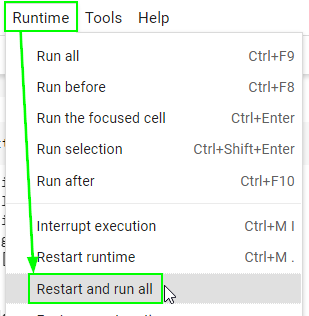

In [46]:
print('🎯 Restart and run all successful')

🎯 Restart and run all successful
